In [1]:
import warnings
import logging
import time
import psutil
import os
import yaml

import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime
import sys
sys.path.append('../')

In [2]:
lat_mapping = {
    'Aspen/Meadow/Wet Area Restoration': 37.482646,
    'Chipping': 37.627402,
    'Commercial Thin': 37.465931,
    'Group Selection Harvest': 37.464555,
    'Herbicide Application': 37.655861,
    'Lop and Scatter': 37.551419,
    'Mastication': 37.462986,
    'Mowing': 37.4928,
    'Oak Woodland Management': 37.534775,
    'Pile Burning': 37.572375,
    'Piling': 37.461292,
    'Rehabilitation of Understocked Area': 37.525904,
    'Single Tree Selection': 37.523401,
    'Thinning (Manual)': 37.625516,
    'Transition Harvest': 37.506553,
    'Tree Planting': 37.534028,
    'Variable Retention Harvest': 37.520369,

    'Alternative Prescription': 37.488371,
    'Fuel Break (pursuant to FPRs)': 37.473531,
    'Group Selection': 37.465912,
    'Invasive Plant Removal': 37.614452,
    'Landing Treated': 37.605668,
    'Roadway Clearance': 37.507632,
    'Sanitation Harvest': 37.591843,
    'Site Preparation': 37.562715,
    'Thinning (Mechanical)': 37.551381,
}

lon_mapping = {
    'Aspen/Meadow/Wet Area Restoration': -123.21911033,
    'Chipping': -123.249295,
    'Commercial Thin': -123.390699,
    'Group Selection Harvest': -123.438758,
    'Herbicide Application': -123.47236,
    'Lop and Scatter': -123.222054,
    'Mastication': -123.49278,
    'Mowing': -123.219545,
    'Oak Woodland Management': -123.221341,
    'Pile Burning': -123.222952,
    'Piling': -123.550139,
    'Rehabilitation of Understocked Area': -123.459845,
    'Single Tree Selection': -123.545137,
    'Thinning (Manual)': -123.317925,
    'Transition Harvest': -123.220133,
    'Tree Planting': -123.322739,
    'Variable Retention Harvest': -123.220724,

    'Alternative Prescription': -123.339323,
    'Fuel Break (pursuant to FPRs)': -123.349238,
    'Group Selection':  -123.358234,
    'Invasive Plant Removal': -123.483481,
    'Landing Treated': -123.398283,
    'Roadway Clearance': -123.383823,
    'Sanitation Harvest': -123.373429,
    'Site Preparation': -123.323224,
    'Thinning (Mechanical)': -123.373398,

}

In [3]:
lats = list(lat_mapping.values())
lats.sort()
lons = list(lon_mapping.values())
lons.sort()

In [4]:
lats[1] - lats[0]

0.0016940000000005284

In [5]:
lats[2] - lats[1]

0.0015689999999963788

In [6]:
from shapely import Point

In [24]:
pts = []
for lat, lon in zip(lat_mapping.values(), lon_mapping.values()):
    pts.append(Point(lon, lat))

In [27]:
a = gpd.GeoDataFrame()

In [28]:
a.geometry = pts

C:\Users\sky\.conda\envs\its_recode\Lib\site-packages\geopandas\geodataframe.py:221: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  object.__setattr__(self, attr, val)


<Axes: >

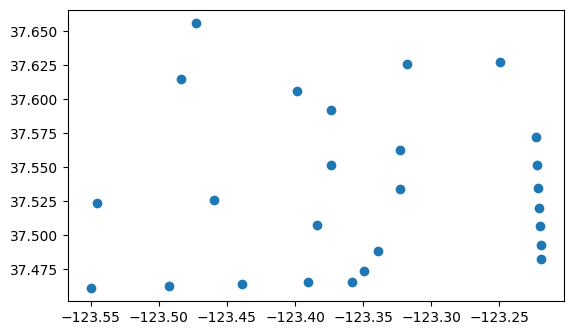

In [30]:
a.plot()

In [7]:
coord_delta = 0.0015
lat_min, lat_max = min(lat_mapping.values()), max(lat_mapping.values())
lon_min, lon_max = min(lon_mapping.values()), max(lon_mapping.values())






In [71]:
delta = int(np.ceil(np.sqrt(len(ti_gdf['ACTIVITY_DESCRIPTION'].unique()))))

In [72]:
lat_delta = (lat_max - lat_min)/delta
lon_delta = (lon_max - lon_min)/delta

In [73]:
lats = np.arange(lat_min, lat_max, coord_delta)

In [74]:
OFFSET = 0.00001

In [79]:
coords = np.mgrid[lon_min:lon_max:lon_delta, lat_min:lat_max:lat_delta].T
coords = coords.reshape(coords.shape[0]*coords.shape[1], -1)

In [101]:
for i, t in enumerate(ti_gdf['ACTIVITY_DESCRIPTION'].unique()):
    ti_gdf.loc[ti_gdf['ACTIVITY_DESCRIPTION'] == t, 'geometry'] = Point(coords[i])

<Axes: >

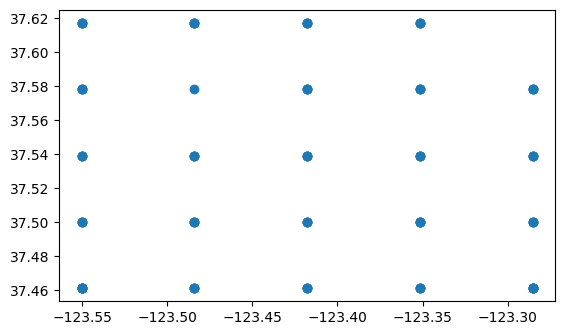

In [104]:
ti_gdf.plot()